# Übung 2: Farben

### Detektion mit Farben

In unserem SkinApp Projekt befassen wir uns mit der Erkennung von Hautkrankheiten, zum Beispiel auf Händen. Als erstes muss dabei die Handfläche vom Hintergrund getrennt werden. Damit dies einfacher geht, haben wir eine Photobox entwickelt, die die Hände vor grünem Hintergrund aufnimmt. Sie sollen nun untersuchen, ob es damit tatsächlich einfacher ist die Handflächen oder Handrückseiten zu finden.





In [3]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
# resolution of images in figure
mpl.rcParams['figure.dpi']= 200
# figure size in inches
mpl.rcParams["figure.figsize"] = [10,5]



### Aufgabe 1: Hand Segmentierung

Als erstes sollen sie versuchen die Handflächen mittels der Farbe der Haut zu detektieren. Dazu ist es möglicherweise hilfreich das Bild in einer anderen Farbraum zu transferieren. Für Hautsegmentierung könnte sich zum Beispiel der YCrCb oder der HSV Farbraum einigen. Stellen Sie das Bild in diesen Farbräumen dar und suchen Sie dann entsprechende Schwellwerte um eine binäre Maske der Hand zu erstellen. Für Schwellwerte stehen in OpenCV eigentlich die Funktionen `cv.threshold()` und `cv2.inRange()` zur Verfügung, für einfache Fälle ist oft auch ein Vergleich direkt in numpy möglich.

[ 67 117 155]


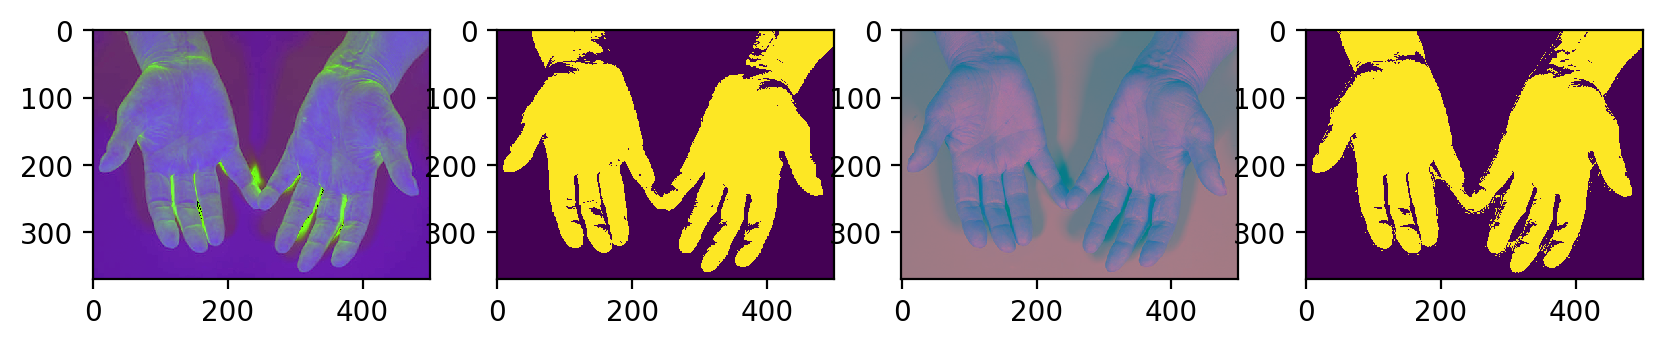

In [148]:
image_grey_back = cv2.imread('images/hand_grey_small.png')
image_color_space_hsv = cv2.cvtColor(image_grey_back, cv2.COLOR_RGB2HSV)
image_color_space_ycr = cv2.cvtColor(image_grey_back, cv2.COLOR_RGB2YCrCb)

# simple threshold in RGB
min_hsv = np.array([80, 70, 130])
max_hsv = np.array([200, 200, 255])

skin_image_hsv = cv2.inRange(image_color_space, min_hsv, max_hsv)

min_ycr = np.array([70, 50, 138])
max_ycr = np.array([200, 200, 255])

skin_image_ycr = cv2.inRange(image_color_space_ycr, min_ycr, max_ycr)

plt.subplot(1, 4, 1)
plt.imshow(image_color_space_hsv)
plt.subplot(1, 4, 2)
plt.imshow(skin_image_hsv)
plt.subplot(1,4,3)
plt.imshow(image_color_space_ycr)
plt.subplot(1,4,4)
plt.imshow(skin_image_ycr)

# check which pixels have which value to select treshold
print(image_color_space_ycr[100, 50])

### Aufgabe 2: Hintergrund Segmentierung

Im folgenden wird ein Bild mit grünem Hintergrund geladen. Führen Sie darauf die gleiche Segmentierung wie beim oberen Bild durch und stellen Sie diese dar.

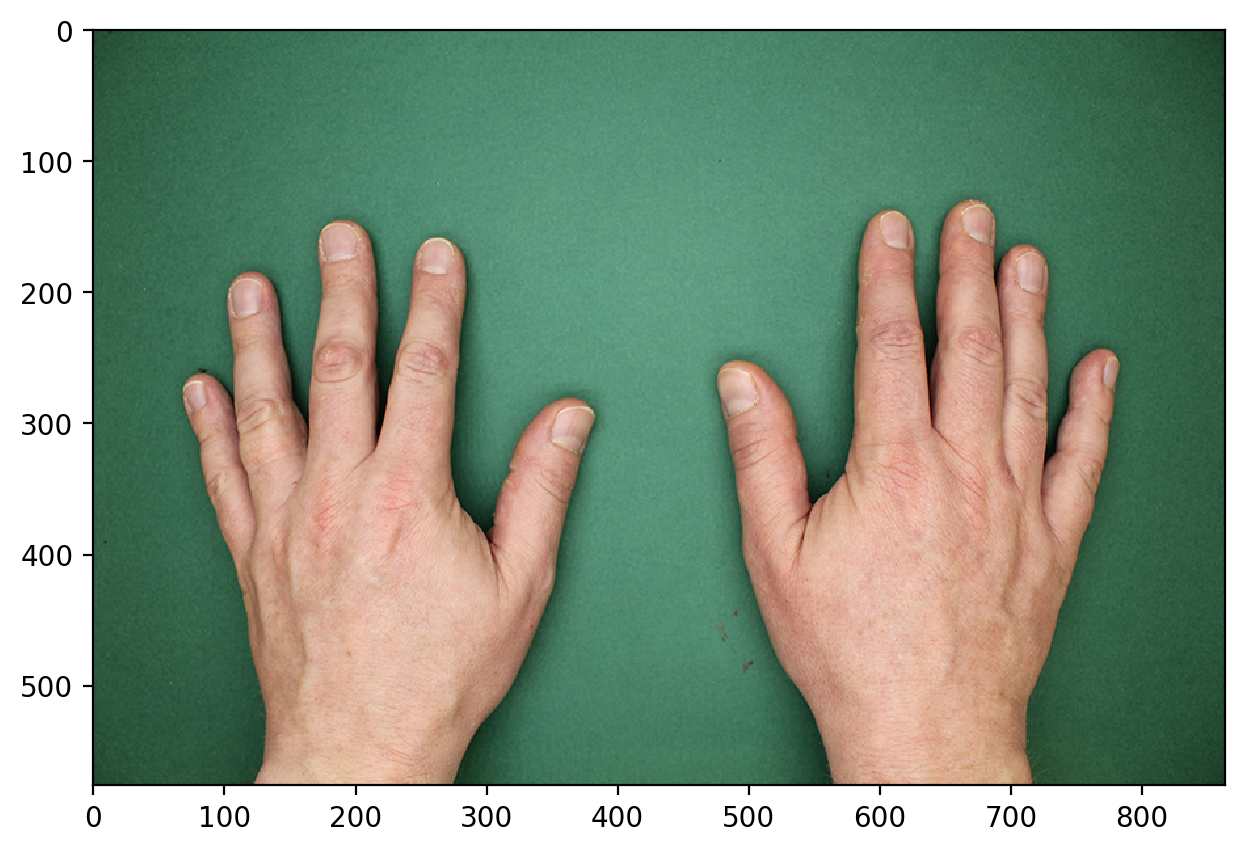

In [151]:
image_green_back = cv2.imread('images/hand_green_small.png')
image_green_back = cv2.cvtColor(image_green_back, cv2.COLOR_BGR2RGB)
plt.imshow(image_green_back)

[ 92 157 131]


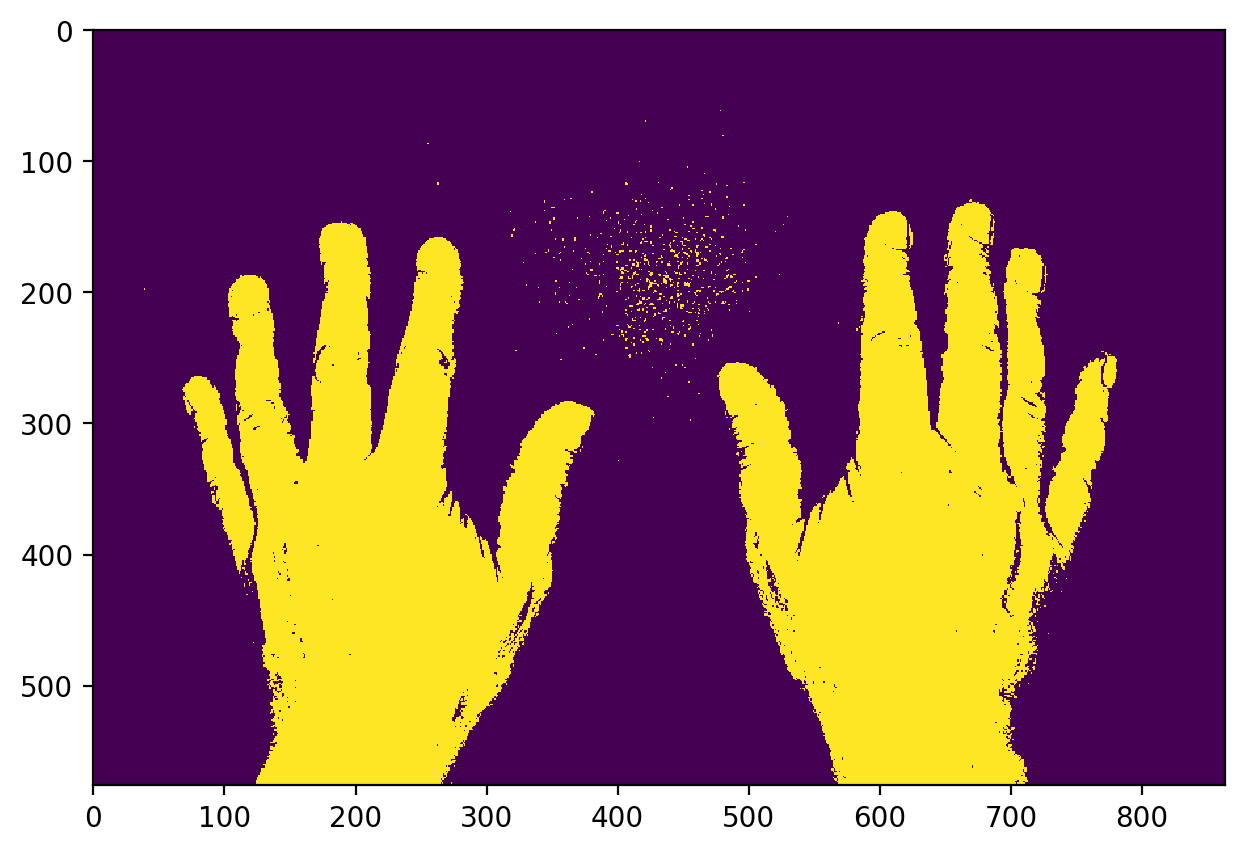

In [180]:
min = np.array([100, 120, 100])
max = np.array([255, 255, 255])

image_segmented = cv2.inRange(image_green_back, min, max)
plt.imshow(image_segmented)

# check which pixels have which rgb combination
print(image_green_back[200, 450])

Segmentieren Sie nun an Stelle der Haut den grünen Hintergrund. Können Sie damit eine bessere Unterscheidung zwischen Hand und Hintergrund erhalten? Stellen sie die beiden Bilder nebeneinander dar.

[ 92 157 131]


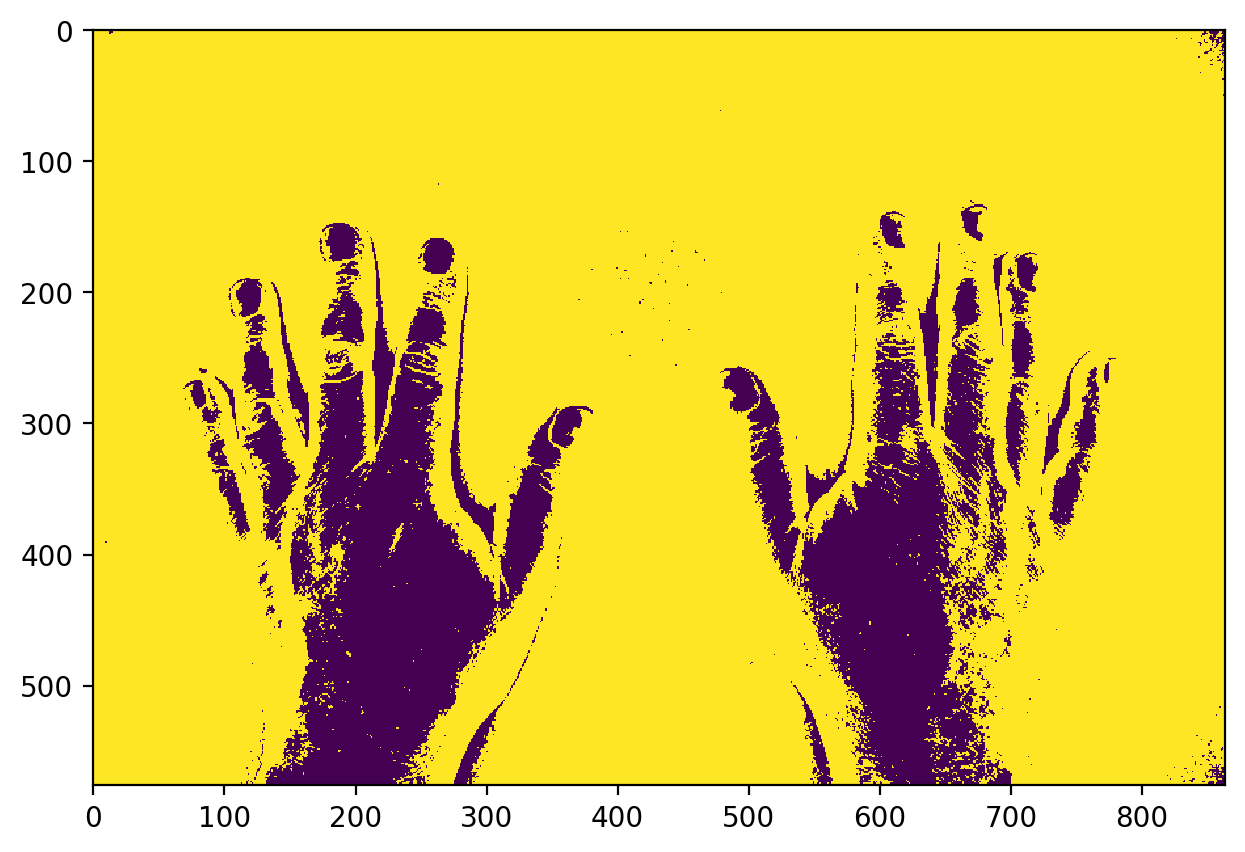

In [202]:
min = np.array([29, 65, 40])
max = np.array([220, 165, 144])

image_background_segmented = cv2.inRange(image_green_back, min, max)

# check which pixels have which rgb combination
print(image_green_back[200, 450])

plt.imshow(image_background_segmented)

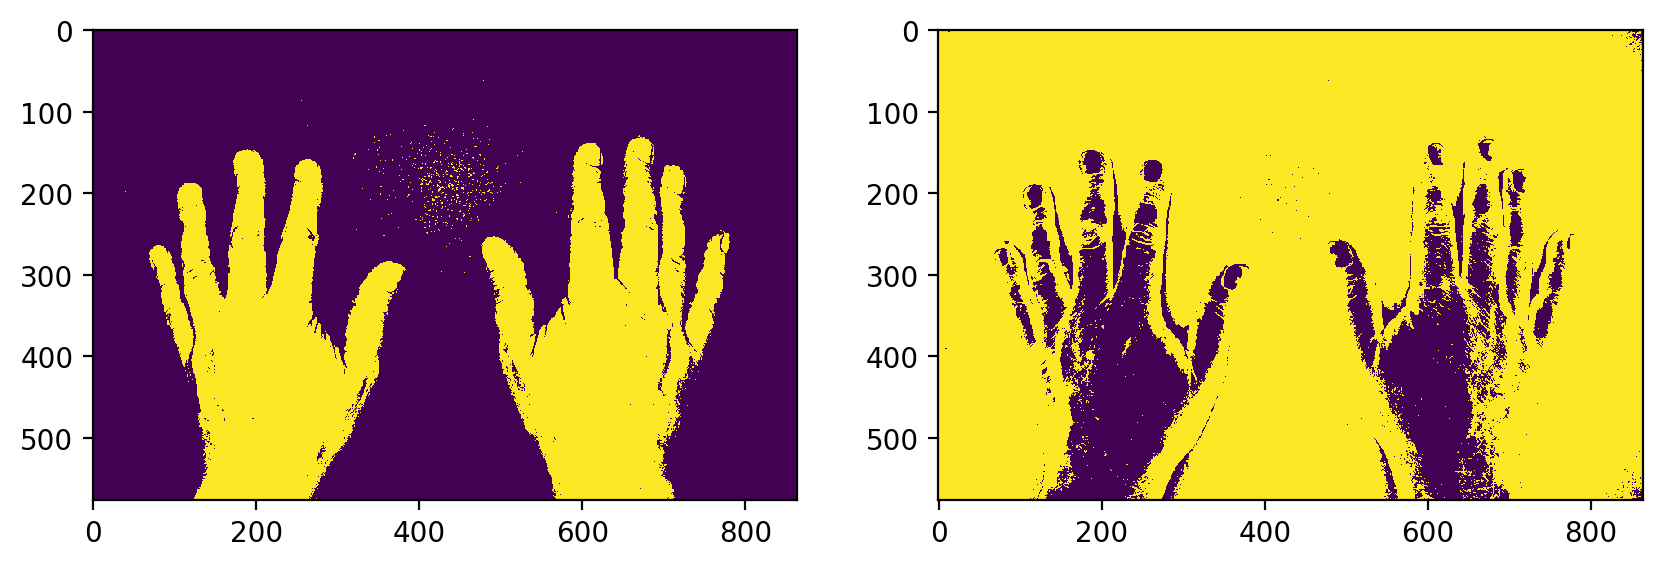

In [203]:
plt.subplot(1,2,1)
plt.imshow(image_segmented)
plt.subplot(1,2,2)
plt.imshow(image_background_segmented)

### Aufgabe 3: Bluescreen

Blue Screening wird in der Filmindustrie verwendet um Regionen in einem Bild, zum Beispiel ein blauer Hintergrund mit einem anderen Bild zu ersetzen.

Entwickeln sie ein Program, das 2 Bilder mit Hilfe dieser Technik aufeinander legt. Gehen Sie dazu wie folgt vor:

* Berechnen sie für jeden Pixel die Transparenz α aufgrund des Farbwertes von I1 

* Berechnen sie die Pixel des Ausgabebildes O, indem sie die beiden Bilder I1 und I2 mit Hilfe des α Werts übereinander legen. Eine mögliche Funktion dazu ist 

$$ O =\alpha*I_1 +(1−\alpha)*I_2 $$

* Dies wird als Alpha Blendung bezeichnet.

Ein Beispielbild mit blauem Hintergrund, sowie ein Beispiel Hintergrund werden im anschliessenden Code geladen. Allerdings haben die Bilder noch nicht die gleiche Grösse und müssen also zuerst noch skaliert werden. Sie können aber auch andere Bilder aus dem Internet verwenden.

[179 203 207 255]
(648, 972, 4)


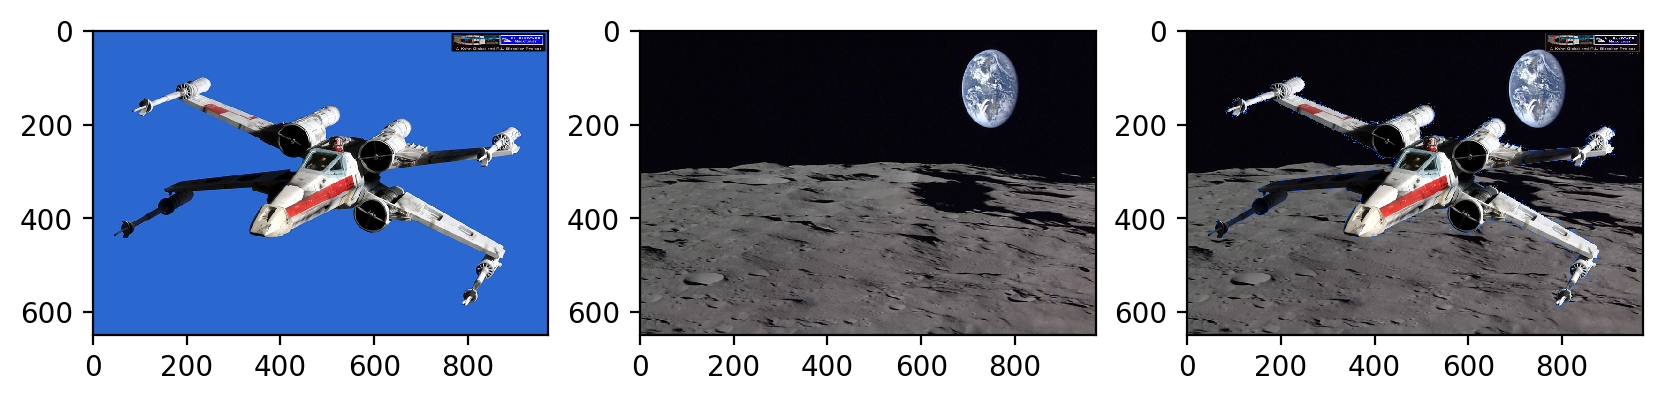

In [21]:
# airplane
foreground = cv2.imread('images/2011-04-29_KG_RLB_RED_LEADER-003C_small.png')
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
# convert to image with alpha channel
foreground = cv2.cvtColor(foreground, cv2.COLOR_RGB2RGBA)

# moon
background = cv2.imread('images/landscape-moon.png', cv2.IMREAD_UNCHANGED)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
# convert to image with alpha channel
background = cv2.cvtColor(background, cv2.COLOR_RGB2RGBA)

# resize image to match foreground
background = cv2.resize(background, (972, 648), interpolation = cv2.INTER_AREA)

# go through every pixel. If the pixel has a blue channel value equal to 207 (background),
# set this pixel to the pixel of the background, else the foreground.
for i in range(648):
    for j in range(972):
        pixel_foreground = foreground[i,j]
        pixel_background = background[i,j]
        if pixel_foreground[2] >= 200 and pixel_foreground[1] < 170 and pixel_foreground[0] < 200:
            merge_image[i,j] = np.array([pixel_background[0], pixel_background[1], pixel_background[2], 255])
        else:
            merge_image[i,j] = np.array([pixel_foreground[0], pixel_foreground[1], pixel_foreground[2], 255])
   

plt.subplot(1, 3, 1)
plt.imshow(foreground)
plt.subplot(1, 3, 2)
plt.imshow(background)
plt.subplot(1, 3, 3)
plt.imshow(merge_image)
print(foreground[300,500])
print(background.shape)